### Learning Objectives
 
**After this lesson, you will be able to:**
- Describe the different components of time series data (trend, seasonality, cyclical, and residual).
- Decompose time series data into trend, seasonality, cyclical, and residual components.
- Plot the decomposed components of a time series.

### Lesson Guide

#### Decomposition
- [Time Series Decomposition](#A)
- [Decompose a Time Series](#B)
- [Plotting the Residuals and the ACF and PACF of the Residuals](#C)
- [Independent Practice](#D)
----

<h2><a id = "A">Time Series Decomposition</a></h2>

Splitting a time series into several components is useful for both understanding the data and diagnosing the appropriate forecasting model. Each of these components will represent an underlying pattern. 

- **Trend**: A trend exists when there is a long-term increase or decrease in the data. It does not have to be linear. Sometimes, we will refer to a trend “changing direction” when, for example, it might go from an increasing trend to a decreasing trend.

- **Seasonal**: A seasonal pattern exists when a series is influenced by seasonal factors (e.g., the quarter of the year, the month, or day of the week). Seasonality is always of a fixed and known period.

- **Residual**: The leftover or error component.

### Guided Practice

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from dateutil.relativedelta import *
%matplotlib inline

data = pd.read_csv('airline_passengers.csv')
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
data.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [2]:
data.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


### StatsModels Time Series Tools 

The Python StatsModels library offers a wide variety of reliable time series analysis tools. We'll start off by loading the autocorrelation and partial autocorrelation functions, as well as a function for decomposing time series.

In [3]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

### Plot the raw data.

We can look at the raw data first. Let's plot the time series.

<AxesSubplot:title={'center':'Passenger Count Per Month'}, xlabel='Month'>

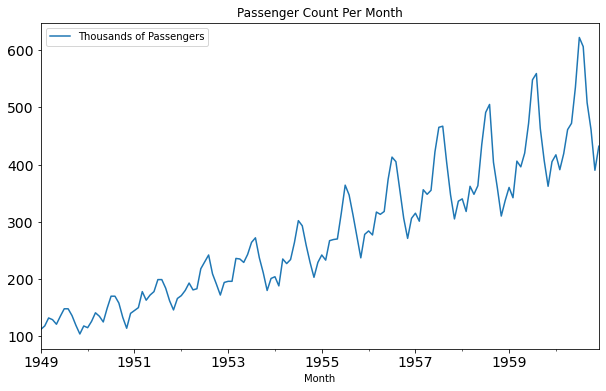

In [4]:
data.plot(figsize=(10,6), title= 'Passenger Count Per Month', fontsize=14)

<h2><a id = "B">Decompose the time series and plot using the `.seasonal_decompose()` function.</a></h2>

Using the `seasonal_decompose()` function, we can break the time series into its constituent parts.

Use the function on the `riders` data with a frequency of `12`, then plot the data. We're using a frequency of 12 because the data are monthly.

The decomposition object from `seasonal_decompose()` has a `.plot()` function, like with Pandas DataFrames.

In [5]:
data.dtypes

Thousands of Passengers    int64
dtype: object

<Figure size 432x288 with 0 Axes>

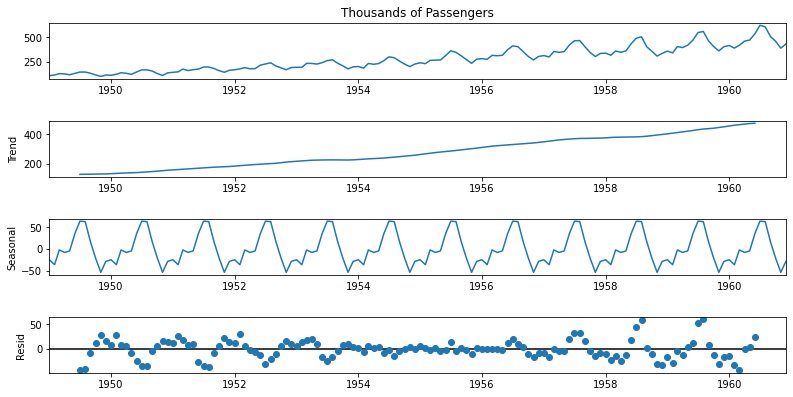

In [6]:
decomposition = seasonal_decompose(data['Thousands of Passengers'], period=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(12, 6)

### Plot a single component of the decomposition plot.

We can pull out just one component of the decomposition plot.

<AxesSubplot:xlabel='Month'>

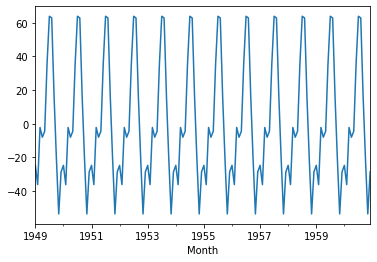

In [7]:
seasonal = decomposition.seasonal 
seasonal.plot()

<AxesSubplot:xlabel='Month'>

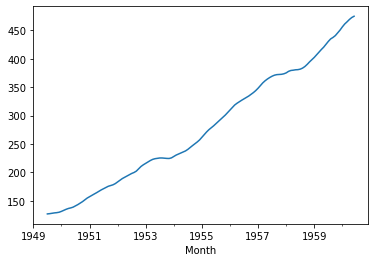

In [8]:
trend = decomposition.trend
trend.plot()

<h2><a id = "C">Examining the residuals and their ACF and PACF.</a></h2>

Let's examine the residuals of our data.

<AxesSubplot:xlabel='Month'>

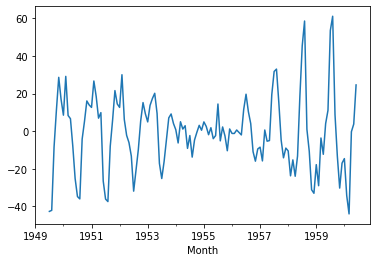

In [9]:
resid= decomposition.resid
resid.plot()

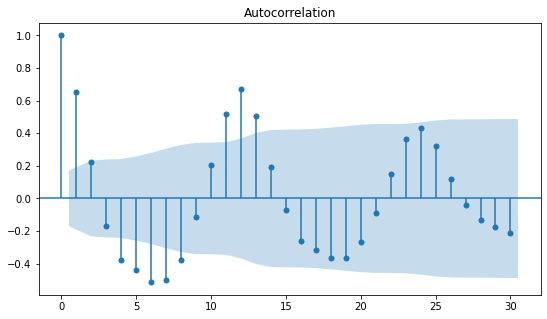

In [10]:
fig, ax = plt.subplots(figsize=(9,5))
plot_acf(resid.dropna(), lags=30, ax = ax)
plt.show()

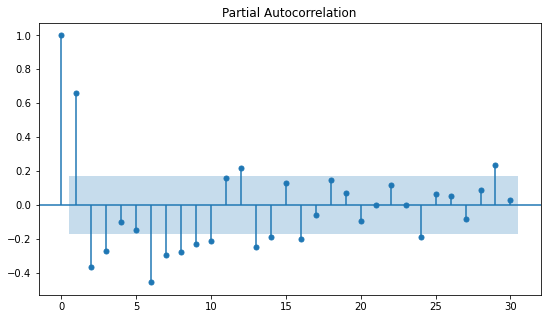

In [11]:
fig, ax = plt.subplots(figsize=(9,5))
plot_pacf(resid.dropna(), lags=30, ax=ax)
plt.show()

We notice that the residuals of our time series don't have significant autocorrelation. This is because the trend and seasonal components have been taken out and adjusted for. 

# Recap

* Trend is a long-term change in the data. 
* Seasonality is a pattern of a fixed period that repeats in the data. 
* Residuals are the error components of the data.
* StatsModels contains a `seasonal_decompose()` function that breaks a time series into its components.

<h2><a id="D">Independent Practice</a></h2>

**Instructor Note:** These are optional and can be assigned as student practice questions outside of class.

### 1) Import the mapquest google trends data set, preprocess the data, and plot the raw time series.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from dateutil.relativedelta import *
%matplotlib inline

In [13]:
google = pd.read_csv('data/mapquest_google_trends.csv')

### 2) Decompose the time series and plot using the `.seasonal_decompose()` function.

In [14]:
# A:

### 3) Interpret these plots.

In [15]:
# A: